### How do Output Feature Maps (OFM) look like?
The following code loads two sample images, using Scikit-Learn’s load_sample_images() (which loads two color images, one of a Chinese temple, and the other of a flower). The pixel intensities (for each color channel) is represented as a byte from 0 to 255, so we scale these features simply by dividing by 255, to get floats ranging from 0 to 1.

In [45]:
from sklearn.datasets import load_sample_image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

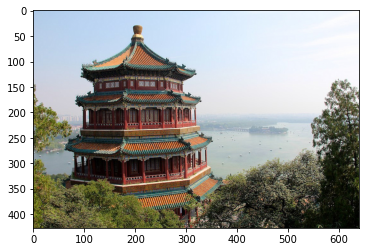

In [52]:
plt.imshow(china)

In [53]:
plt.imshow(flower)

In [16]:
china.shape

(427, 640, 3)

In [17]:
flower.shape

(427, 640, 3)

In [12]:
images = np.array([china, flower])

batch_size = num images

In [20]:
batch_size, height, width, channels = images.shape

create 7x7 filters for 3 channels

### Quiz Time

Have you ever wondered why filter dimensions are usually chosen to be odd numbers (3, 5, 7)?

In [64]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

In [65]:
filters.shape

(7, 7, 3, 2)

create a filter which detects horizontal lines

visualization

neurons using these weights will ignore everything in their receptive field except for the central horizontal line (since all inputs will get multiplied by 0, except for the ones located in the central horizontal line).


In [76]:
filters[3, :, :, 0] = 1 # limit to 3rd row, consider all columns, consider all channels and pick 0th "cube"

create a filter which detects vertical lines

In [77]:
filters[:, 3, :, 1] = 1 # consider all rows, limit to 3rd column, consider all columns, all channels and pick 1st "cube"

Compute a 2-D convolution given input and 4-D filters tensors https://www.tensorflow.org/api_docs/python/tf/nn/conv2d 

- images: input mini batch (4D)
- filters: 4D filter "cubes"
- strides: 1
- padding "SAME": output neurons is equal to the number of input neurons divided by the stride




### Quiz Time
Can you think of alternative ways to create filters that detect horizontal/ vertical edges?

In [78]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plot 1st image's 2nd feature map

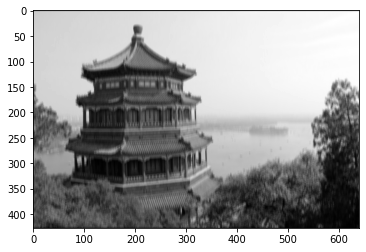

In [79]:
plt.imshow(outputs[0, :, :, 1], cmap="gray")

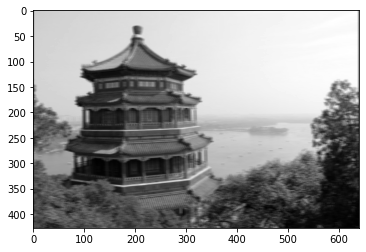

In [80]:
plt.imshow(outputs[0, :, :, 0], cmap="gray")

In [60]:
plt.imshow(outputs[1, :, :, 0], cmap="gray")

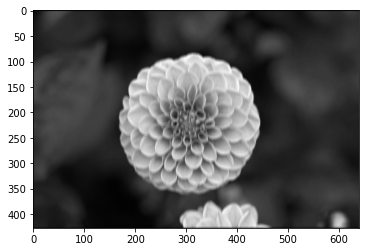

In [61]:
plt.imshow(outputs[1, :, :, 1], cmap="gray")

Now if all neurons in a layer use the same vertical line filter (and the same bias term), and you feed the network the input image shown in Figure 14-5 (bottom image), the layer will output the top-left image. Notice that the vertical white lines get enhanced while the rest gets blurred. Similarly, the upper-right image is what you get if all neurons use the same horizontal line filter; notice that the horizontal white lines get enhanced while the rest is blurred out. Thus, a layer full of neurons using the same filter outputs a feature map, which highlights the areas in an image that activate the filter the most. Of course you do not have to define the filters manually: instead, during training the convolutional layer will automatically learn the most useful filters for its task, and the layers above will learn to combine them into more complex patterns.
